In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import Circle
import urllib.request

In [47]:
#2.01 . Escriba una función que calcule el factorial de n, con n ∈ N
#       Calcule los primeros 20 n´umeros factoriales.

In [43]:
def n_factorial(n:int):
    factorial=1
    for i in range(1,n+1):
        factorial*=i
        print(factorial)
    
    

In [44]:
n_factorial(20)

1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
6227020800
87178291200
1307674368000
20922789888000
355687428096000
6402373705728000
121645100408832000
2432902008176640000


In [ ]:
#2.0.3 Máximos

In [2]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt'

In [1]:
filename = 'Data/DatosMaximo.txt'

In [2]:
urllib.request.urlretrieve(url, filename)

NameError: name 'urllib' is not defined

In [5]:
data = np.loadtxt(filename)

maximos=[]

for i in range(2,len(data)-1):

    if data[i][1]>data[i-1][1] and data[i][1]>data[i+1][1]:
        #print('a')
        maximos.append((data[i][0],data[i][1]))
       

    

In [6]:
maximos=np.array(maximos)
    

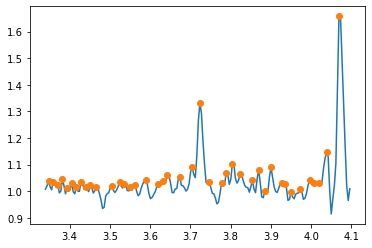

In [46]:
plt.plot(data[:,0],data[:,1], maximos[:,0], maximos[:,1],'o')

In [ ]:
#Sucesión de Fibonacci

In [22]:
def fibonacci(n):
    f_0=0
    f_1=1
    lista=[f_0, f_1]
    for i in range(n):
        f_2=f_0+f_1
        f_0=f_1
        f_1=f_2
        lista.append(f_2)

    return np.array(lista)

In [34]:
def grafica(n):
    eje_x=np.linspace(0,n+1,n+2)
    plt.plot(eje_x, fibonacci(n),color='black')
    plt.legend(['Serie Fibonacci'])
    plt.show()

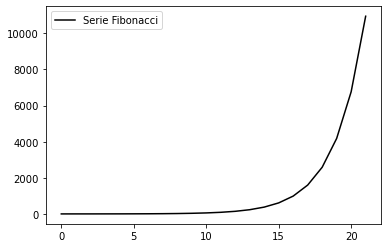

In [35]:
grafica(20)

In [26]:
def n_aureo(n):
    n_fib=fibonacci(n)
    lista2=[]
    eje_x=np.linspace(0,n,n+1)
    for i in range(0,n+1):
        print(n_fib[i])
        if n_fib[i]==0:
            lista2.append(n_fib[i])
        else:
            lista2.append(n_fib[i+1]/n_fib[i])
    
    eje_y=np.array(lista2)
    n_aureo=(1+5**(1/2))/2
    n_aureos=np.ones((n+1,))*n_aureo
    plt.plot(eje_x,eje_y, eje_x, n_aureos, 'r--')
    plt.legend(['Estimación usando la serie','Número Aureo'])
    plt.show()

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765


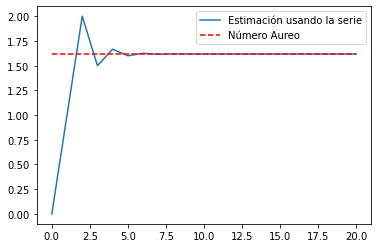

In [27]:
n_aureo(20)

In [28]:
def f(x,y):
    return 2*x*(1-2/(x**2+y**2))

In [29]:
h=0.001

In [30]:
def dx(f,x,y):
    return (f(x+h,y)-f(x-h,y))/(2*h)

def dy(f,x,y):
    return -(f(x, y+h)-f(x,y-h))/(2*h)

In [31]:
Nx=25
ax=-4
bx=4
x=np.linspace(ax,bx,Nx)


Ny=25
ay=-4
by=4
y=np.linspace(ay,by,Ny)

Vx=np.zeros((Nx,Ny))
Vy=np.zeros((Nx,Ny))
#print(Vx)
print(x)

[-4.         -3.66666667 -3.33333333 -3.         -2.66666667 -2.33333333
 -2.         -1.66666667 -1.33333333 -1.         -0.66666667 -0.33333333
  0.          0.33333333  0.66666667  1.          1.33333333  1.66666667
  2.          2.33333333  2.66666667  3.          3.33333333  3.66666667
  4.        ]


In [32]:
for i in range(Nx):
    for j in range(Ny):
        
        Vx[i,j]=dx(f,x[i],y[j])
        Vy[i,j]=dy(f,x[i],y[j])

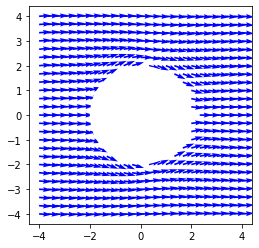

In [33]:
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(111)
R=2
c = Circle((0, 0), R, color='w', linewidth=0, zorder=10)

for i in range(Nx):
    for j in range(Ny):
        if (x[i]**2+y[j]**2)>R**2:
            ax.quiver(x[i],y[j], Vx[i,j], Vy[i,j], color='b')
ax.add_patch(c)